In [137]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

In [138]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, LabelEncoder

In [139]:
from google.colab import drive
drive.mount('/content/gdrive/')

!unzip -qq "/content/gdrive/MyDrive/open (5).zip"

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [140]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [141]:
train_columns = pd.DataFrame({'columns':train.columns,
                             'info':['아이디','(음악 등이) 댄스에 적합함.','에너지','키(음높이?)','소리의 세기','언어능력','반주구간','기약성','활기참','발렌스','템포','재생길이','장르']})

In [142]:
train_columns

,columns,info
0,ID,아이디
1,danceability,(음악 등이) 댄스에 적합함.
2,energy,에너지
3,key,키(음높이?)
4,loudness,소리의 세기
5,speechiness,언어능력
6,acousticness,반주구간
7,instrumentalness,기약성
8,liveness,활기참
9,valence,발렌스


In [143]:
# 데이터 모양을 보여주는 함수
def resumetable(df):
  print(f'데이터셋 형상: {df.shape}')
  summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
  summary = summary.reset_index()
  summary = summary.rename(columns={'index':'피처'})
  summary['결측값 개수'] = df.isnull().sum().values
  summary['고윳값 개수'] = df.nunique().values
  summary['첫번째 값'] = df.loc[0].values
  summary['두번째 값'] = df.loc[1].values
  summary['세번째 값'] = df.loc[2].values

  return summary
  
resumetable(train)

데이터셋 형상: (25383, 13)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫번째 값,두번째 값,세번째 값
0,ID,object,0,25383,TRAIN_00000,TRAIN_00001,TRAIN_00002
1,danceability,float64,0,824,0.3341,0.6344,0.3983
2,energy,float64,0,852,0.9231,0.5955,0.1107
3,key,int64,0,12,10,10,8
4,loudness,float64,0,7687,0.854,0.2826,0.2459
5,speechiness,float64,0,1344,0.3797,0.1378,0.0247
6,acousticness,float64,0,1912,0.008,0.0,0.774
7,instrumentalness,float64,0,1685,0.0002,0.7137,0.0
8,liveness,float64,0,1581,0.7697,0.1597,0.5105
9,valence,float64,0,1571,0.7902,0.4162,0.4291


In [144]:
le = LabelEncoder()

In [150]:
train['genre'] = le.fit_transform(train['genre'])

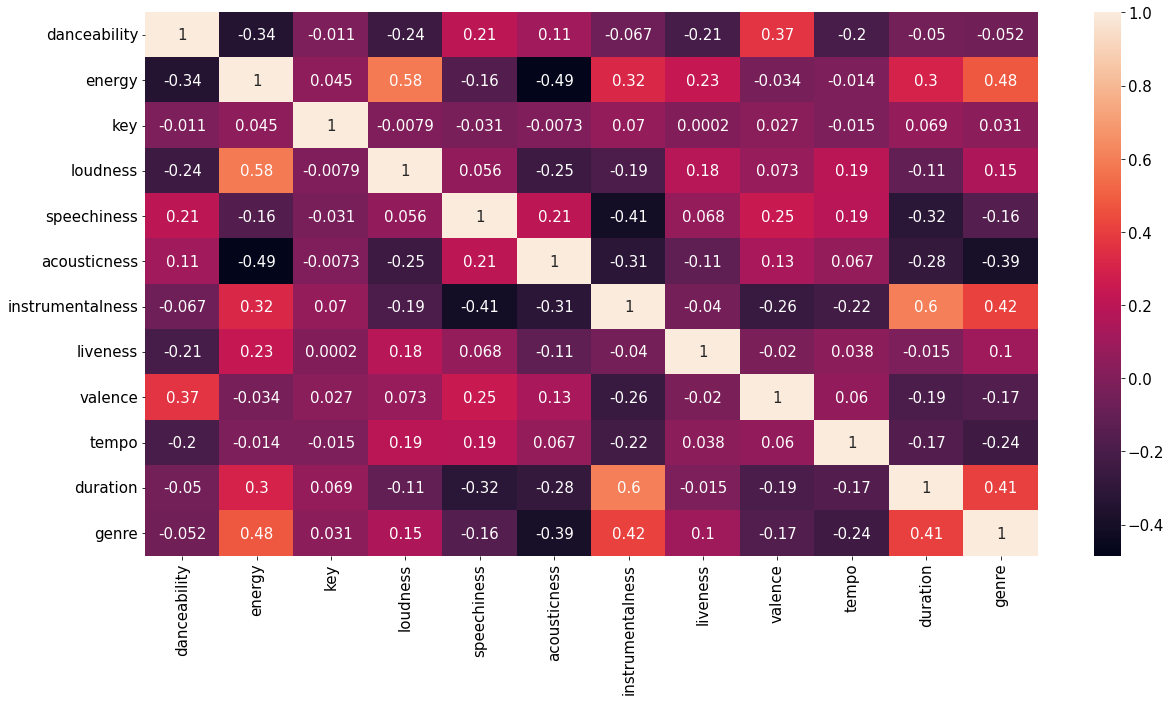

In [151]:
#상관분석하기
#각 변수가 어떤 상관 관계가 있는지. 수치가 높을수록 관계가 있다는 것이다.
fig = plt.figure(figsize = (20,10))
sns.heatmap(train.corr(), annot = True)
plt.show()

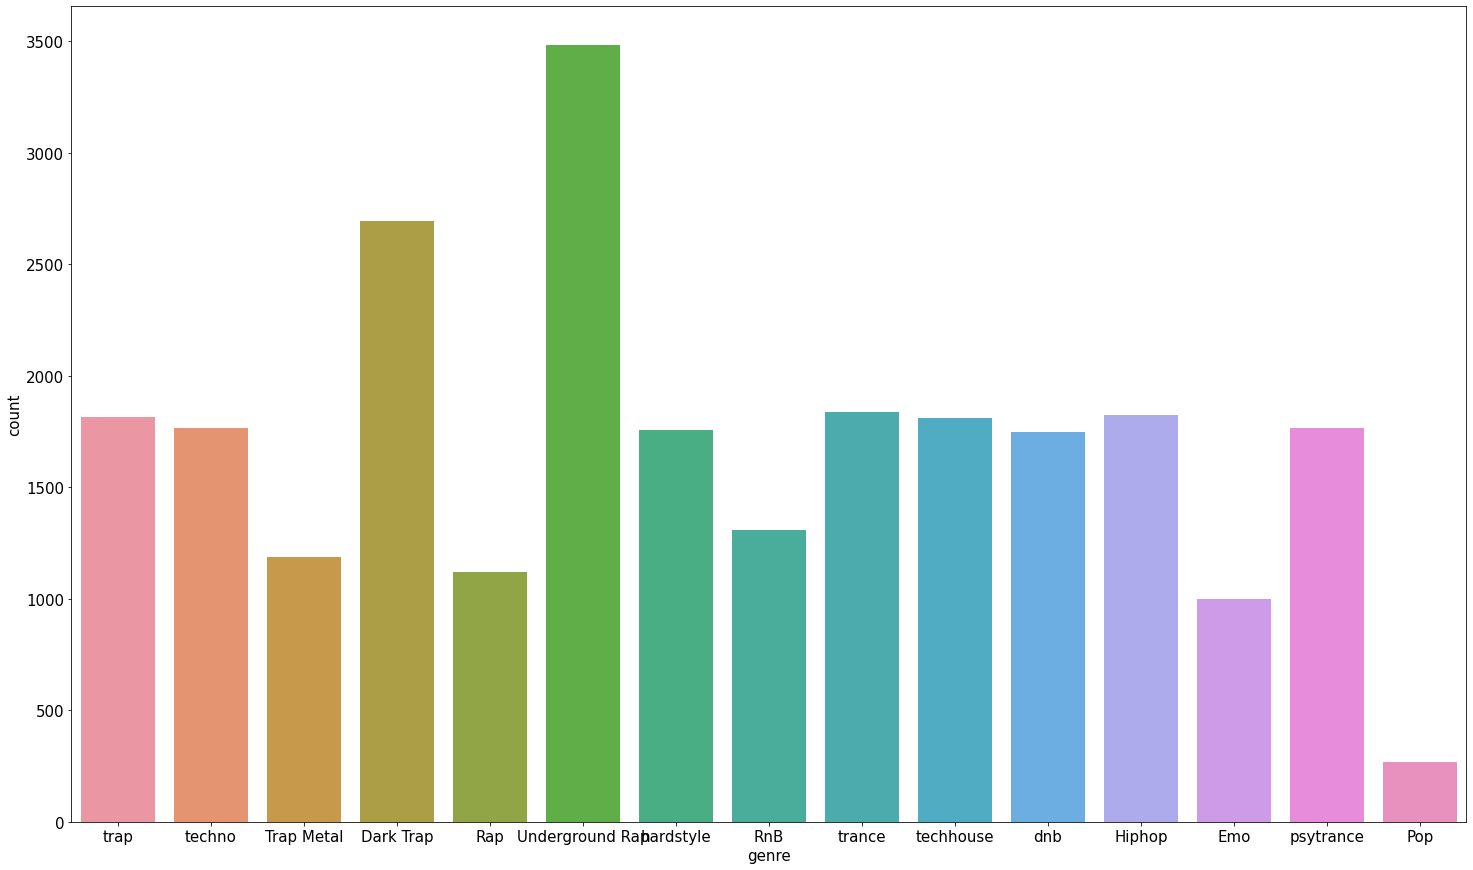

In [153]:
mpl.rc('font',size=15)
plt.figure(figsize=(25,15))

ax = sns.countplot(x='genre',data=train)


In [154]:
train

,ID,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,genre
0,TRAIN_00000,0.3341,0.9231,10,0.8540,0.3797,0.0080,0.0002,0.7697,0.7902,0.5391,175,trap
1,TRAIN_00001,0.6344,0.5955,10,0.2826,0.1378,0.0000,0.7137,0.1597,0.4162,0.3043,513,techno
2,TRAIN_00002,0.3983,0.1107,8,0.2459,0.0247,0.7740,0.0000,0.5105,0.4291,0.2324,151,Trap Metal
3,TRAIN_00003,0.3139,0.9702,2,0.9252,0.9590,0.0371,0.3015,0.2539,0.0577,0.5406,246,trap
4,TRAIN_00004,0.0735,0.9452,5,0.7702,0.1397,0.2583,0.0015,0.1774,0.1128,0.3176,229,Dark Trap
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25378,TRAIN_25378,0.8814,0.3398,6,0.4602,0.3825,0.4505,0.0000,0.4222,0.8753,0.4081,88,Underground Rap
25379,TRAIN_25379,0.7505,0.5657,0,0.6682,0.1038,0.1281,0.0000,0.0596,0.9583,0.4273,123,Trap Metal
25380,TRAIN_25380,0.2520,0.7617,8,0.4928,0.0410,0.0003,0.8395,0.0843,0.1372,0.7828,353,dnb
25381,TRAIN_25381,0.6202,0.3455,0,0.6499,0.7960,0.4818,0.0000,0.2007,0.0194,0.9756,120,Dark Trap


##(1) StandardScaler()

In [244]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [245]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [246]:
# X는 독립변수이므로 종속변수를 제거합니다. 또한 target 이외의 문자열 데이터를 제거합니다.
X = train[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration']]
# y는 종속변수로 값을 설정합니다.
y = train[['genre']]

# train에서와 마찬가지로 문자열이 포함된 특성은 제거합니다.
test = test.drop(["ID",], axis = 1)

In [247]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)

In [249]:
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,0.3341,0.9231,0.8540,0.3797,0.0080,0.0002,0.7697,0.7902,0.5391,175
1,0.6344,0.5955,0.2826,0.1378,0.0000,0.7137,0.1597,0.4162,0.3043,513
2,0.3983,0.1107,0.2459,0.0247,0.7740,0.0000,0.5105,0.4291,0.2324,151
3,0.3139,0.9702,0.9252,0.9590,0.0371,0.3015,0.2539,0.0577,0.5406,246
4,0.0735,0.9452,0.7702,0.1397,0.2583,0.0015,0.1774,0.1128,0.3176,229
...,...,...,...,...,...,...,...,...,...,...
25378,0.8814,0.3398,0.4602,0.3825,0.4505,0.0000,0.4222,0.8753,0.4081,88
25379,0.7505,0.5657,0.6682,0.1038,0.1281,0.0000,0.0596,0.9583,0.4273,123
25380,0.2520,0.7617,0.4928,0.0410,0.0003,0.8395,0.0843,0.1372,0.7828,353
25381,0.6202,0.3455,0.6499,0.7960,0.4818,0.0000,0.2007,0.0194,0.9756,120


In [250]:

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
val_pred = dtc.predict(X_valid)

# Macro f1 score을 사용하기 위해 average 인자 값을 "macro" 로 설정해줍니다.
print("현재 Macro F1 Score의 검증 점수는 {}입니다.".format(f1_score(val_pred, y_valid, average = "macro")))

현재 Macro F1 Score의 검증 점수는 0.5530647634517348입니다.


In [251]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)
X_train_scaled = std.transform(X_train)
X_test_scaled = std.transform(X_valid)
dtc.fit(X_train_scaled, y_train)
val_pred = dtc.predict(X_valid)
print("현재 Macro F1 Score의 검증 점수는 {}입니다.".format(f1_score(val_pred, y_valid, average = "macro")))

현재 Macro F1 Score의 검증 점수는 0.037626251930580445입니다.


In [221]:
X_train

array([[9.227e-01, 2.746e-01, 1.000e+00, ..., 7.042e-01, 8.304e-01,
        8.300e+01],
       [3.764e-01, 9.651e-01, 2.000e+00, ..., 3.236e-01, 5.404e-01,
        2.220e+02],
       [6.362e-01, 5.482e-01, 8.000e+00, ..., 5.926e-01, 5.891e-01,
        2.040e+02],
       ...,
       [3.185e-01, 2.346e-01, 1.000e+01, ..., 1.888e-01, 5.802e-01,
        2.460e+02],
       [4.000e-01, 9.638e-01, 8.000e+00, ..., 3.861e-01, 7.831e-01,
        2.340e+02],
       [4.809e-01, 3.838e-01, 4.000e+00, ..., 4.649e-01, 3.256e-01,
        2.390e+02]])

In [222]:
X_train_scaled

array([[ 1.56087356, -1.33473046, -1.18873719, ...,  1.04890061,
         1.47746239, -1.64951031],
       [-0.69761489,  1.17312254, -0.91549799, ..., -0.28275748,
         0.16959009, -0.30375705],
       [ 0.37643838, -0.3410323 ,  0.72393721, ...,  0.65843019,
         0.38922244, -0.47802725],
       ...,
       [-0.93698241, -1.48000797,  1.27041561, ..., -0.75440097,
         0.34908429, -0.07139677],
       [-0.60004885,  1.16840102,  0.72393721, ..., -0.06408005,
         1.26414391, -0.18757691],
       [-0.26559577, -0.93812286, -0.36901959, ...,  0.21162846,
        -0.7991374 , -0.13916852]])

In [223]:
X_train_scaled.shape

(20306, 11)

In [224]:
X_train

array([[9.227e-01, 2.746e-01, 1.000e+00, ..., 7.042e-01, 8.304e-01,
        8.300e+01],
       [3.764e-01, 9.651e-01, 2.000e+00, ..., 3.236e-01, 5.404e-01,
        2.220e+02],
       [6.362e-01, 5.482e-01, 8.000e+00, ..., 5.926e-01, 5.891e-01,
        2.040e+02],
       ...,
       [3.185e-01, 2.346e-01, 1.000e+01, ..., 1.888e-01, 5.802e-01,
        2.460e+02],
       [4.000e-01, 9.638e-01, 8.000e+00, ..., 3.861e-01, 7.831e-01,
        2.340e+02],
       [4.809e-01, 3.838e-01, 4.000e+00, ..., 4.649e-01, 3.256e-01,
        2.390e+02]])

In [225]:
X_train_scaled_ss = X_train_scaled.reshape(223366,1)
X_train_data = X_train.reshape(223366,1)

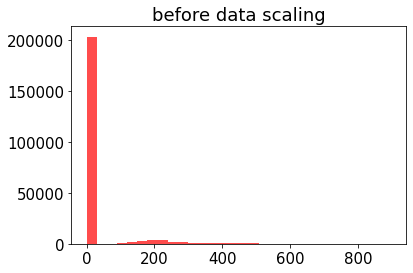

In [226]:
plt.hist(X_train_data, bins=30, color= 'red', alpha = 0.7)
plt.title('before data scaling')
plt.show()

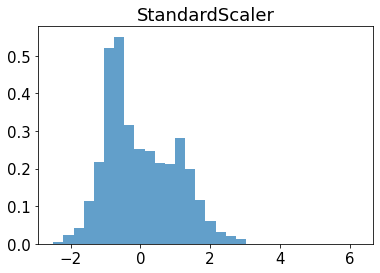

In [227]:
plt.hist(X_train_scaled_ss, bins=30, alpha = 0.7, density = True)
plt.title('StandardScaler')
plt.show()

##(2) MinMaxScaler()

MinMaxScaler는 모든 피처들이 0과 1사이의 데이터값을 갖도록 만들어줍니다.

즉, 피처별로 최솟값은 0이 되고, 최댓값은 1이 되는 것이죠.

데이터가 2차원인 겅우, 모든 데이터는 x, y 축의 0과 1 사이에 존재하게 됩니다.

이 방법 또한 이상치가 존재한다면, 이상치가 극값이 되어 데이터가 아주 좁은 범위에 분포하게 되기 때문에 스케일링 방법으로 적절하지 않습니다.

In [228]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)
X_train_scaled = mms.transform(X_train)
X_test_scaled = mms.transform(X_valid)
dtc.fit(X_train_scaled, y_train)
val_pred = dtc.predict(X_valid)
print("현재 Macro F1 Score의 검증 점수는 {}입니다.".format(f1_score(val_pred, y_valid, average = "macro")))

현재 Macro F1 Score의 검증 점수는 0.3211117684973746입니다.


In [229]:
X_train_scaled_mms = X_train_scaled.reshape(223366,1)

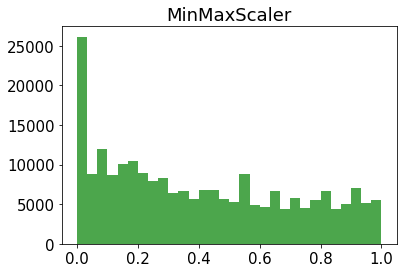

In [230]:
plt.hist(X_train_scaled_mms, bins=30, color='green', alpha = 0.7)
plt.title('MinMaxScaler')
plt.show()

##(3) MaxAbsScaler()

In [231]:
from sklearn.preprocessing import MaxAbsScaler

mas = MaxAbsScaler()
mas.fit(X_train)
X_train_scaled = mas.transform(X_train)
X_test_scaled = mas.transform(X_valid)
dtc.fit(X_train_scaled, y_train)
val_pred = dtc.predict(X_valid)
print("현재 Macro F1 Score의 검증 점수는 {}입니다.".format(f1_score(val_pred, y_valid, average = "macro")))

현재 Macro F1 Score의 검증 점수는 0.3029943239516531입니다.


In [232]:
X_train_scaled_mas = X_train_scaled.reshape(223366,1)

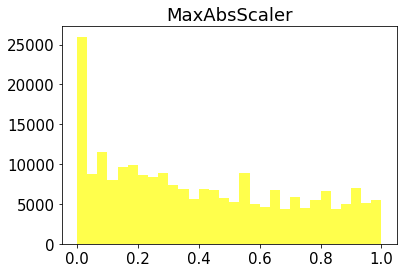

In [233]:
plt.hist(X_train_scaled_mas, bins=30, color='yellow', alpha = 0.7)
plt.title('MaxAbsScaler')
plt.show()

##(4) RobustScaler()

In [234]:
from sklearn.preprocessing import RobustScaler

rbs = RobustScaler()
X_train_scaled = rbs.fit_transform(X_train)
X_test_scaled = rbs.transform(X_valid)
dtc.fit(X_train_scaled, y_train)
val_pred = dtc.predict(X_valid)
print("현재 Macro F1 Score의 검증 점수는 {}입니다.".format(f1_score(val_pred, y_valid, average = "macro")))

현재 Macro F1 Score의 검증 점수는 0.04361802462443862입니다.


## (5)Normalizer()

In [235]:
from sklearn.preprocessing import Normalizer

rbs = RobustScaler()
X_train_scaled = rbs.fit_transform(X_train)
X_test_scaled = rbs.transform(X_valid)
dtc.fit(X_train_scaled, y_train)
val_pred = dtc.predict(X_valid)
print("현재 Macro F1 Score의 검증 점수는 {}입니다.".format(f1_score(val_pred, y_valid, average = "macro")))

현재 Macro F1 Score의 검증 점수는 0.022134301489310414입니다.


In [241]:
import pandas as pd
 
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_boston
 
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
X = df[['B', 'LSTAT']]
 
print(X.values)

[[396.9    4.98]
 [396.9    9.14]
 [392.83   4.03]
 ...
 [396.9    5.64]
 [393.45   6.48]
 [396.9    7.88]]
